## import libraries

In [1]:
import torch

In [2]:
gamma = 1
threshold = 1e-10

define env

In [3]:
capital_max = 100
n_state = capital_max + 1
rewards = torch.zeros(n_state)
rewards[-1] = 1

probability of getting heads is 40%

In [4]:
head_prob = 0.4

In [5]:
env = {'capital_max': capital_max,
       'head_prob': head_prob,
       'rewards': rewards,
       'n_state': n_state}

In [6]:
def policy_evaluation(env, policy, gamma, threshold):
  head_prob = env['head_prob']
  n_state = env['n_state']
  capital_max = env['capital_max']
  V = torch.zeros(n_state)
  while True:
    V_temp = torch.zeros(n_state)
    for state in range(1, capital_max):
      action = policy[state].item()
      V_temp[state] += head_prob * (rewards[state + action] + gamma * V[state + action])
      V_temp[state] += (1 - head_prob) * (rewards[state - action] +gamma * V[state - action])
    max_delta = torch.max(torch.abs(V - V_temp))
    V = V_temp.clone()
    if max_delta <= threshold:
      break
  return V    

In [7]:
def policy_improvement(env, V, gamma):
  head_prob = env['head_prob']
  n_state = env['n_state']
  capital_max = env['capital_max']
  policy = torch.zeros(n_state).int()
  
  for state in range(1, capital_max):
    v_actions = torch.zeros(min(state, capital_max - state) + 1)  
    for action in range(1, min(state, capital_max - state) + 1):
      v_actions[action] += head_prob * (rewards[state + action] + gamma * V[state + action])
      v_actions[action] += (1 - head_prob) * (rewards[state - action] +gamma * V[state - action])
    policy[state] = torch.argmax(v_actions)
  return policy

In [8]:
def policy_iteration(env, gamma, threshold):
  n_state = env['n_state']
  policy = torch.zeros(n_state).int()
  while True:
    V = policy_evaluation(env, policy, gamma, threshold)
    policy_improved = policy_improvement(env, V, gamma)
    if torch.equal(policy_improved, policy):
      return V, policy_improved
    policy = policy_improved

In [9]:
V_optimal, optimal_policy = policy_iteration(env, gamma, threshold)

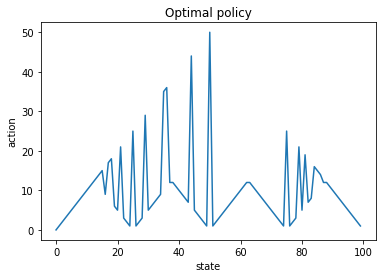

In [10]:
import matplotlib.pyplot as plt
plt.plot(optimal_policy[:100].numpy())
plt.title('Optimal policy')
plt.xlabel('state')
plt.ylabel('action')
plt.show()